# Trigger Sculpting

The mass plane after the 4 good jets cut already had the 4-jet combinations peaking at 125 GeV, so I wanted to look at the effect of the trigger by turning on the individual triggers one by one.

This notbook just saves some aggregation plots for these studies


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

**Trigger efficiency**

In [4]:
trig_eff_file = "../data/trig_eff_2015.h5"
trig_df = pd.read_hdf(trig_eff_file, key='trig_df')

In [5]:
trig_df

data 2015  2b data 2015  4b SM NR  \
all                                  0.000019      0.000222  0.028576   
HLT_2j35_btight_2j35_L14J15.0ETA25   0.000017      0.000181       NaN   
HLT_j100_2j55_bmedium                0.000009      0.000092  0.027095   
HLT_j225_bloose                      0.000002      0.000025  0.007167   

                                    4b data 2015  
all                                     0.000019  
HLT_2j35_btight_2j35_L14J15.0ETA25           NaN  
HLT_j100_2j55_bmedium                   0.000009  
HLT_j225_bloose                         0.000002

In [6]:
rel_effs = trig_df['data 2015'] / trig_df.loc['all','data 2015']

In [7]:
rel_effs

all                                   1.000000
HLT_2j35_btight_2j35_L14J15.0ETA25    0.916691
HLT_j100_2j55_bmedium                 0.475099
HLT_j225_bloose                       0.105414
Name: data 2015, dtype: float64

In [8]:
labels = ["Combination",
          "HLT_2j35_btight_2j35_L14J15.0ETA25",
          "HLT_j100_2j55_bmedium",
          "HLT_j225_bloose"]

colors = ['k','g','b','r']

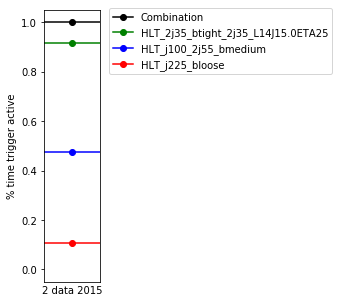

In [22]:
# 4b
plt.figure(figsize=(1,5))

for eff,l,c in zip(rel_effs.values,labels,colors):
    #print(eff)
    plt.plot([-0.1,0.5,1.1],[eff]*3,color=c,linestyle='-',marker='o',
             label=l)#,drawstyle='steps')

ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlim(0,1)
plt.xlabel('2b data 2015')
plt.ylabel('% time trigger active')
plt.ylim(-0.05,1.05)
plt.legend(loc='upper right',bbox_to_anchor=(5.25,1.025))

plt.savefig('../figures/data_15/2015_triggers/individualTriggerEffs.pdf', bbox_inches='tight')

plt.show()

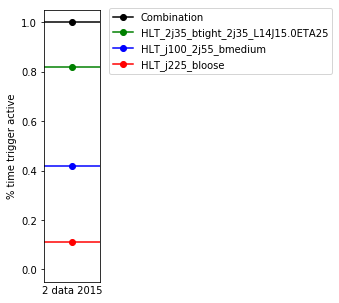

In [23]:
# 2b
rel_effs = trig_df['2b data 2015'] / trig_df.loc['all','2b data 2015']

plt.figure(figsize=(1,5))

for eff,l,c in zip(rel_effs.values,labels,colors):
    #print(eff)
    plt.plot([-0.1,0.5,1.1],[eff]*3,color=c,linestyle='-',marker='o',label=l)

ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlim(0,1)
plt.xlabel('2b data 2015')
plt.ylabel('% time trigger active')
plt.ylim(-0.05,1.05)
plt.legend(loc='upper right',bbox_to_anchor=(5.25,1.025))

plt.savefig('../figures/2b_data_15/2015_triggers/individualTriggerEffs.pdf', bbox_inches='tight')

plt.show()


Make the analogous plot for the signal as well

In [10]:
sig_effs = trig_df['4b SM NR'] / trig_df.loc['all','4b SM NR']

In [11]:
sig_effs = np.nan_to_num(sig_effs)
sig_effs

array([1.        , 0.        , 0.94815235, 0.25078484])

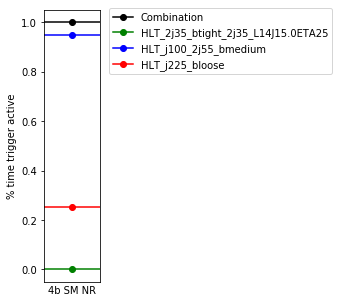

In [15]:
plt.figure(figsize=(1,5))

for eff,l,c in zip(sig_effs,labels,colors):
    #print(eff)
    plt.plot([-0.1,0.5,1.1],[eff]*3,color=c,linestyle='-',marker='o',
             label=l)#,drawstyle='steps')

ax = plt.gca()
ax.set_xticks([])
ax.set_xticklabels([])
plt.xlim(0,1)
plt.xlabel('4b SM NR')
plt.ylabel('% time trigger active')
plt.ylim(-0.05,1.05)
plt.legend(loc='upper right',bbox_to_anchor=(5.25,1.025))

plt.savefig('../figures/SMNR/triggerFirst/individualTriggerEffs.pdf',
            bbox_inches='tight')

plt.show()

**Question:** Is the trigger sculpting the # of valid pairings selection?

In [ ]:
# 2b
#b = np.array([0.78755517, 0.17767773, 0.0347671 ])
# b1 = np.
# b2 = np.
# b3 = np.

In [16]:
# 4b
b = np.array([0.75768398, 0.20108225, 0.04123377])
b1 = np.array([0.75469605, 0.20385195, 0.04145201])
b2 = np.array([0.84580592, 0.12541118, 0.02878289])
b3 = np.array([0.88268956, 0.08726753, 0.03004292])


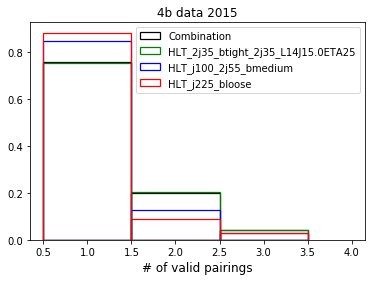

In [17]:
for bi, l, c in zip([b,b1,b2,b3],labels,colors):

    plt.bar(range(1,4),bi,width=1,label=l,fill=False,
            edgecolor=c,linewidth=1.25,facecolor=None)

#break
plt.xlabel('# of valid pairings',fontsize=12)
plt.title('4b data 2015')
plt.legend()

xmin,_ = plt.xlim()
plt.xlim(xmin,4.5-xmin)

plt.savefig('../figures/data_15/2015_triggers/MDR_validPairings_separateTriggers.pdf')
plt.show()